In [1]:
# 获取数据加载器
from data_loader import get_caltech101_loaders

train_loader, val_loader, test_loader = get_caltech101_loaders()

# 预训练微调模式

### 1a
#### 冻结主干网络，仅训练分类头

#### `step_size=10, gamma=0.5, backbone_lr=0, head_lr=1e-2, patience=5, reg=1e-4`, data augmentation

#### Train Acc=1.0, Val Acc=92.90%, epochs=13

#### [TEST RESULT] Loss: 0.2784 | Accuracy: 91.02%

Total parameters: 11,228,325
Trainable parameters: 51,813



Epoch 1/50
Train Loss: 4.4896 | Acc: 5.12%
Val   Loss: 3.9550 | Acc: 18.32%
LR: 1.00e-03
--------------------------------------------------



Epoch 2/50
Train Loss: 3.6729 | Acc: 32.67%
Val   Loss: 3.2058 | Acc: 49.67%
LR: 1.00e-03
--------------------------------------------------



Epoch 3/50
Train Loss: 2.9842 | Acc: 57.14%
Val   Loss: 2.6086 | Acc: 66.17%
LR: 1.00e-03
--------------------------------------------------



Epoch 4/50
Train Loss: 2.4306 | Acc: 70.46%
Val   Loss: 2.1395 | Acc: 74.26%
LR: 1.00e-03
--------------------------------------------------



Epoch 5/50
Train Loss: 2.0059 | Acc: 78.55%
Val   Loss: 1.8084 | Acc: 79.21%
LR: 1.00e-03
--------------------------------------------------



Epoch 6/50
Train Loss: 1.6981 | Acc: 82.14%
Val   Loss: 1.5491 | Acc: 80.36%
LR: 1.00e-03
--------------------------------------------------



Epoch 7/50
Train Loss: 1.4672 | Acc: 84.94%
Val   Loss: 1.3624 | Acc: 84.32%
LR: 1.00e-03
--------------------------------------------------



Epoch 8/50
Train Loss: 1.2806 | Acc: 86.92%
Val   Loss: 1.2118 | Acc: 83.50%
LR: 1.00e-03
--------------------------------------------------



Epoch 9/50
Train Loss: 1.1431 | Acc: 88.41%
Val   Loss: 1.1116 | Acc: 86.47%
LR: 1.00e-03
--------------------------------------------------



Epoch 10/50
Train Loss: 1.0313 | Acc: 89.27%
Val   Loss: 1.0315 | Acc: 85.97%
LR: 1.00e-03
--------------------------------------------------



Epoch 11/50
Train Loss: 0.9451 | Acc: 90.76%
Val   Loss: 0.9861 | Acc: 87.13%
LR: 5.00e-04
--------------------------------------------------



Epoch 12/50
Train Loss: 0.9057 | Acc: 91.25%
Val   Loss: 0.9617 | Acc: 87.29%
LR: 5.00e-04
--------------------------------------------------



Epoch 13/50
Train Loss: 0.8748 | Acc: 91.38%
Val   Loss: 0.9382 | Acc: 86.47%
LR: 5.00e-04
--------------------------------------------------



Epoch 14/50
Train Loss: 0.8363 | Acc: 92.29%
Val   Loss: 0.9058 | Acc: 87.46%
LR: 5.00e-04
--------------------------------------------------



Epoch 15/50
Train Loss: 0.8056 | Acc: 92.41%
Val   Loss: 0.8724 | Acc: 87.46%
LR: 5.00e-04
--------------------------------------------------



Epoch 16/50
Train Loss: 0.7737 | Acc: 93.15%
Val   Loss: 0.8462 | Acc: 87.79%
LR: 5.00e-04
--------------------------------------------------



Epoch 17/50
Train Loss: 0.7510 | Acc: 92.99%
Val   Loss: 0.8286 | Acc: 88.12%
LR: 5.00e-04
--------------------------------------------------



Epoch 18/50
Train Loss: 0.7216 | Acc: 93.03%
Val   Loss: 0.8101 | Acc: 87.95%
LR: 5.00e-04
--------------------------------------------------



Epoch 19/50
Train Loss: 0.7059 | Acc: 93.15%
Val   Loss: 0.7925 | Acc: 88.45%
LR: 5.00e-04
--------------------------------------------------



Epoch 20/50
Train Loss: 0.6773 | Acc: 93.61%
Val   Loss: 0.7889 | Acc: 88.28%
LR: 5.00e-04
--------------------------------------------------



Epoch 21/50
Train Loss: 0.6606 | Acc: 93.85%
Val   Loss: 0.7772 | Acc: 88.12%
LR: 2.50e-04
--------------------------------------------------



Epoch 22/50
Train Loss: 0.6546 | Acc: 93.52%
Val   Loss: 0.7801 | Acc: 88.28%
LR: 2.50e-04
--------------------------------------------------



Epoch 23/50
Train Loss: 0.6504 | Acc: 93.98%
Val   Loss: 0.7473 | Acc: 88.94%
LR: 2.50e-04
--------------------------------------------------



Epoch 24/50
Train Loss: 0.6281 | Acc: 94.43%
Val   Loss: 0.7409 | Acc: 88.28%
LR: 2.50e-04
--------------------------------------------------



Epoch 25/50
Train Loss: 0.6244 | Acc: 94.51%
Val   Loss: 0.7442 | Acc: 88.45%
LR: 2.50e-04
--------------------------------------------------



Epoch 26/50
Train Loss: 0.6156 | Acc: 94.35%
Val   Loss: 0.7397 | Acc: 88.28%
LR: 2.50e-04
--------------------------------------------------



Epoch 27/50
Train Loss: 0.6041 | Acc: 94.55%
Val   Loss: 0.7340 | Acc: 88.45%
LR: 2.50e-04
--------------------------------------------------



Epoch 28/50
Train Loss: 0.5951 | Acc: 95.01%
Val   Loss: 0.7321 | Acc: 87.95%
LR: 2.50e-04
--------------------------------------------------
Early stopping at epoch 29


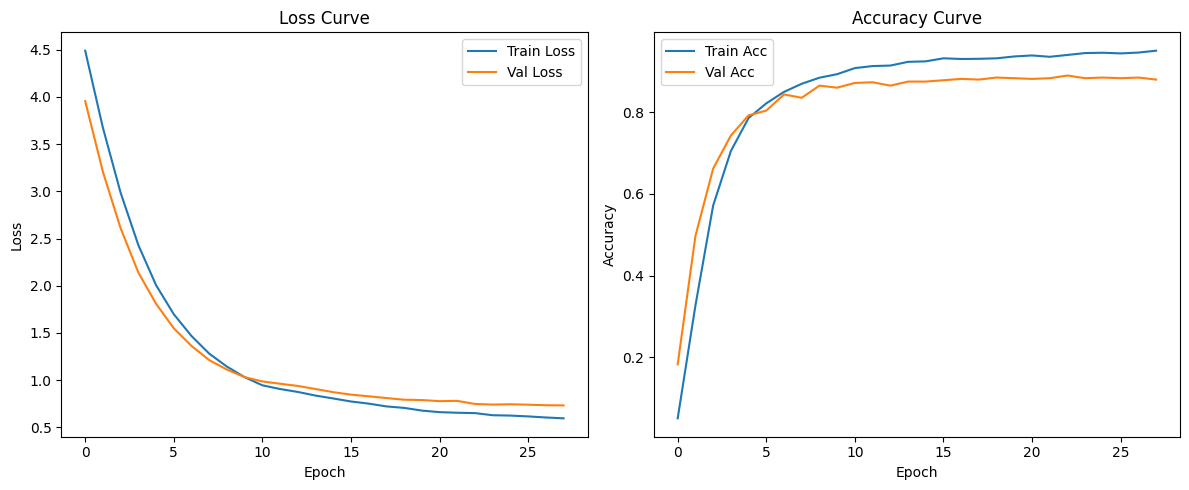

In [5]:
# 加载预训练模型并替换分类头
import torchvision.models as models
import torch.nn as nn
from train import Trainer, count_params

model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 101)  # 替换为101类输出

# 冻结所有非分类头的参数
for name, param in model.named_parameters():
    if "fc" not in name:  
        param.requires_grad = False

# 初始化Trainer，指定仅训练分类头（主干学习率设为0）
trainer = Trainer(
    model=model,
    mode='finetune',      # 使用微调模式
    lr=0.01,              # 分类头学习率（实际生效）
    backbone_lr=0.0,      # 主干学习率设为0（冻结）
    head_lr=0.01,         # 明确指定分类头学习率
    reg=1e-4,
    step_size=10,
    gamma=0.5,
    momentum=0.9
)

count_params(model)

results = trainer.train(train_loader, val_loader, epochs=50, save_path="checkpoints/finetune_resnet18_freeze.pth")
trainer.plot_learning_curve()

In [6]:
test_loss, test_acc = trainer.validate(test_loader)
print(f"\n[TEST RESULT] Loss: {test_loss:.4f} | Accuracy: {test_acc:.2%}")


[TEST RESULT] Loss: 0.6269 | Accuracy: 86.95%


### 3a
#### `step_size=10, gamma=0.5, backbone_lr=1e-3, head_lr=1e-2, patience=5, reg=1e-3`, data augmentation

#### Train Acc=100%, Val Acc=92.24%, 12 epochs

#### [TEST RESULT] Loss: 0.2681 | Accuracy: 91.85%

Total parameters: 11,228,325
Trainable parameters: 11,228,325



Epoch 1/50
Train Loss: 2.7861 | Acc: 42.37%
Val   Loss: 0.8676 | Acc: 81.02%
LR: 1.00e-03
--------------------------------------------------



Epoch 2/50
Train Loss: 0.5359 | Acc: 89.40%
Val   Loss: 0.4755 | Acc: 87.79%
LR: 1.00e-03
--------------------------------------------------



Epoch 3/50
Train Loss: 0.2321 | Acc: 96.33%
Val   Loss: 0.3896 | Acc: 90.76%
LR: 1.00e-03
--------------------------------------------------



Epoch 4/50
Train Loss: 0.1261 | Acc: 98.76%
Val   Loss: 0.3380 | Acc: 90.92%
LR: 1.00e-03
--------------------------------------------------



Epoch 5/50
Train Loss: 0.0740 | Acc: 99.83%
Val   Loss: 0.3144 | Acc: 91.09%
LR: 1.00e-03
--------------------------------------------------



Epoch 6/50
Train Loss: 0.0591 | Acc: 99.75%
Val   Loss: 0.3083 | Acc: 91.25%
LR: 1.00e-03
--------------------------------------------------



Epoch 7/50
Train Loss: 0.0459 | Acc: 99.88%
Val   Loss: 0.3003 | Acc: 92.24%
LR: 1.00e-03
--------------------------------------------------



Epoch 8/50
Train Loss: 0.0374 | Acc: 99.96%
Val   Loss: 0.2934 | Acc: 92.24%
LR: 1.00e-03
--------------------------------------------------



Epoch 9/50
Train Loss: 0.0302 | Acc: 100.00%
Val   Loss: 0.2894 | Acc: 91.58%
LR: 1.00e-03
--------------------------------------------------



Epoch 10/50
Train Loss: 0.0269 | Acc: 100.00%
Val   Loss: 0.2857 | Acc: 91.75%
LR: 1.00e-03
--------------------------------------------------



Epoch 11/50
Train Loss: 0.0235 | Acc: 100.00%
Val   Loss: 0.2898 | Acc: 91.91%
LR: 5.00e-04
--------------------------------------------------



Epoch 12/50
Train Loss: 0.0213 | Acc: 100.00%
Val   Loss: 0.2882 | Acc: 91.25%
LR: 5.00e-04
--------------------------------------------------
Early stopping at epoch 13


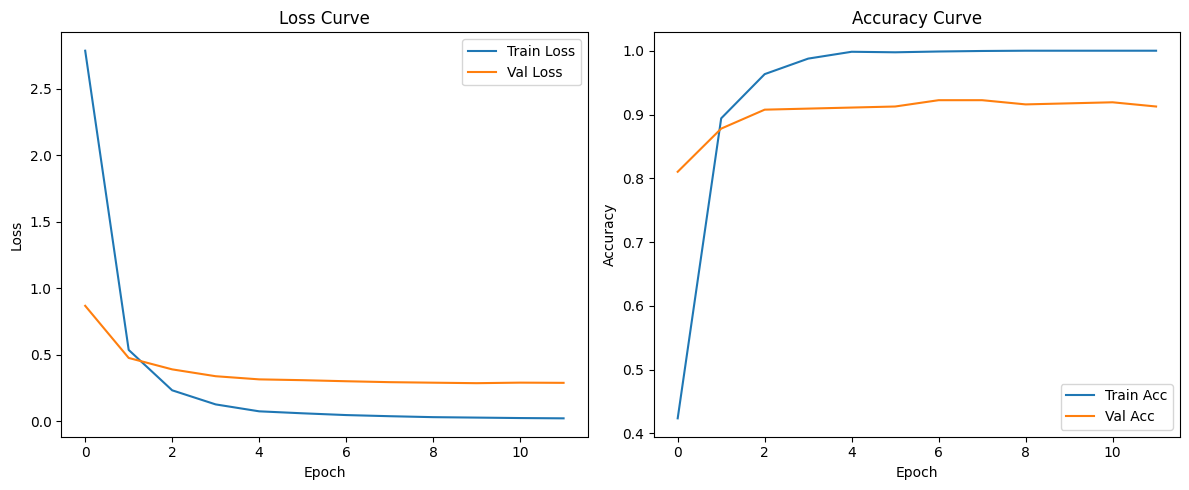

In [7]:
from models import Caltech101Classifier
from train import Trainer, count_params

model = Caltech101Classifier(arch='resnet18', pretrained=True)  # 加载ImageNet权重

trainer = Trainer(
    model=model,
    mode='finetune',
    lr=0.01,                 # 总体学习率
    backbone_lr=0.001,       # 主干网络较小学习率
    head_lr=0.01,            # 分类头较大学习率
    reg=1e-3,
    step_size=10,
    gamma=0.5,
    patience=5,
    momentum=0.9
)

count_params(model)

trainer.train(train_loader, val_loader, epochs=50, save_path="checkpoints/finetune_resnet18_2.pth")
trainer.plot_learning_curve()

### 4a
#### `step_size=10, gamma=0.5, backbone_lr=1e-4, head_lr=1e-2, patience=5, reg=1e-4`, data augmentation

#### Train Acc=99.92%, Val Acc=90.59%, epochs=15

#### [TEST RESULT] Loss: 0.3208 | Accuracy: 89.50%

Total parameters: 11,228,325
Trainable parameters: 11,228,325



Epoch 1/50
Train Loss: 2.9022 | Acc: 40.51%
Val   Loss: 1.0593 | Acc: 77.89%
LR: 1.00e-04
--------------------------------------------------



Epoch 2/50
Train Loss: 0.7384 | Acc: 85.52%
Val   Loss: 0.6134 | Acc: 85.64%
LR: 1.00e-04
--------------------------------------------------



Epoch 3/50
Train Loss: 0.4134 | Acc: 92.99%
Val   Loss: 0.4992 | Acc: 88.61%
LR: 1.00e-04
--------------------------------------------------



Epoch 4/50
Train Loss: 0.2783 | Acc: 95.17%
Val   Loss: 0.4526 | Acc: 89.11%
LR: 1.00e-04
--------------------------------------------------



Epoch 5/50
Train Loss: 0.1997 | Acc: 97.57%
Val   Loss: 0.4084 | Acc: 88.94%
LR: 1.00e-04
--------------------------------------------------



Epoch 6/50
Train Loss: 0.1487 | Acc: 98.80%
Val   Loss: 0.3942 | Acc: 90.26%
LR: 1.00e-04
--------------------------------------------------



Epoch 7/50
Train Loss: 0.1239 | Acc: 99.01%
Val   Loss: 0.3682 | Acc: 89.93%
LR: 1.00e-04
--------------------------------------------------



Epoch 8/50
Train Loss: 0.0954 | Acc: 99.34%
Val   Loss: 0.3620 | Acc: 89.77%
LR: 1.00e-04
--------------------------------------------------



Epoch 9/50
Train Loss: 0.0886 | Acc: 99.46%
Val   Loss: 0.3682 | Acc: 88.61%
LR: 1.00e-04
--------------------------------------------------



Epoch 10/50
Train Loss: 0.0706 | Acc: 99.75%
Val   Loss: 0.3482 | Acc: 90.59%
LR: 1.00e-04
--------------------------------------------------



Epoch 11/50
Train Loss: 0.0575 | Acc: 99.83%
Val   Loss: 0.3353 | Acc: 90.59%
LR: 5.00e-05
--------------------------------------------------



Epoch 12/50
Train Loss: 0.0554 | Acc: 99.88%
Val   Loss: 0.3415 | Acc: 89.77%
LR: 5.00e-05
--------------------------------------------------



Epoch 13/50
Train Loss: 0.0547 | Acc: 99.79%
Val   Loss: 0.3375 | Acc: 90.59%
LR: 5.00e-05
--------------------------------------------------



Epoch 14/50
Train Loss: 0.0489 | Acc: 99.92%
Val   Loss: 0.3400 | Acc: 90.26%
LR: 5.00e-05
--------------------------------------------------



Epoch 15/50
Train Loss: 0.0454 | Acc: 99.88%
Val   Loss: 0.3330 | Acc: 90.43%
LR: 5.00e-05
--------------------------------------------------
Early stopping at epoch 16


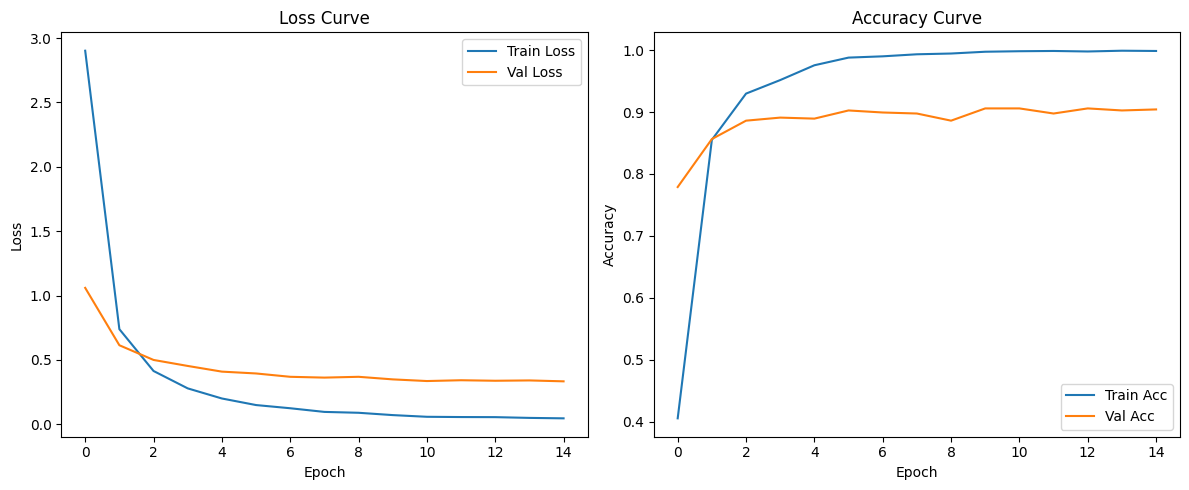

In [8]:
from models import Caltech101Classifier
from train import Trainer, count_params

model = Caltech101Classifier(arch='resnet18', pretrained=True)  # 加载ImageNet权重

trainer = Trainer(
    model=model,
    mode='finetune',
    lr=0.01,                 # 总体学习率
    backbone_lr=0.0001,       # 主干网络较小学习率
    head_lr=0.01,            # 分类头较大学习率
    reg=1e-4,
    step_size=10,
    gamma=0.5,
    patience=5,
    momentum=0.9
)

# 4. 参数统计
count_params(model)

# 5. 开始训练
trainer.train(train_loader, val_loader, epochs=50, save_path="checkpoints/finetune_resnet18_3.pth")

# 6. 可视化
trainer.plot_learning_curve()

### 2a
#### `step_size=10, gamma=0.5, backbone_lr=1e-3, head_lr=1e-2, patience=5, reg=1e-4`, data augmentation

#### Train Acc=1.0, Val Acc=93.07%, epochs=16

#### [TEST RESULT] Loss: 0.2594 | Accuracy: 91.85%

d:\APP\Python\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\APP\Python\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Total parameters: 11,228,325
Trainable parameters: 11,228,325



Epoch 1/50
Train Loss: 2.7442 | Acc: 43.03%
Val   Loss: 0.8161 | Acc: 82.67%
LR: 1.00e-03
--------------------------------------------------



Epoch 2/50
Train Loss: 0.5179 | Acc: 89.27%
Val   Loss: 0.4859 | Acc: 88.45%
LR: 1.00e-03
--------------------------------------------------



Epoch 3/50
Train Loss: 0.2304 | Acc: 96.12%
Val   Loss: 0.3675 | Acc: 91.09%
LR: 1.00e-03
--------------------------------------------------



Epoch 4/50
Train Loss: 0.1272 | Acc: 98.76%
Val   Loss: 0.3294 | Acc: 91.58%
LR: 1.00e-03
--------------------------------------------------



Epoch 5/50
Train Loss: 0.0800 | Acc: 99.34%
Val   Loss: 0.3050 | Acc: 91.91%
LR: 1.00e-03
--------------------------------------------------



Epoch 6/50
Train Loss: 0.0521 | Acc: 99.92%
Val   Loss: 0.2992 | Acc: 91.58%
LR: 1.00e-03
--------------------------------------------------



Epoch 7/50
Train Loss: 0.0392 | Acc: 100.00%
Val   Loss: 0.2904 | Acc: 91.91%
LR: 1.00e-03
--------------------------------------------------



Epoch 8/50
Train Loss: 0.0328 | Acc: 99.96%
Val   Loss: 0.2796 | Acc: 92.24%
LR: 1.00e-03
--------------------------------------------------



Epoch 9/50
Train Loss: 0.0256 | Acc: 100.00%
Val   Loss: 0.2715 | Acc: 92.57%
LR: 1.00e-03
--------------------------------------------------



Epoch 10/50
Train Loss: 0.0236 | Acc: 100.00%
Val   Loss: 0.2705 | Acc: 92.41%
LR: 1.00e-03
--------------------------------------------------



Epoch 11/50
Train Loss: 0.0199 | Acc: 100.00%
Val   Loss: 0.2783 | Acc: 93.07%
LR: 5.00e-04
--------------------------------------------------



Epoch 12/50
Train Loss: 0.0191 | Acc: 100.00%
Val   Loss: 0.2648 | Acc: 92.24%
LR: 5.00e-04
--------------------------------------------------



Epoch 13/50
Train Loss: 0.0182 | Acc: 100.00%
Val   Loss: 0.2648 | Acc: 92.41%
LR: 5.00e-04
--------------------------------------------------



Epoch 14/50
Train Loss: 0.0170 | Acc: 100.00%
Val   Loss: 0.2636 | Acc: 92.24%
LR: 5.00e-04
--------------------------------------------------



Epoch 15/50
Train Loss: 0.0166 | Acc: 100.00%
Val   Loss: 0.2631 | Acc: 92.74%
LR: 5.00e-04
--------------------------------------------------



Epoch 16/50
Train Loss: 0.0157 | Acc: 100.00%
Val   Loss: 0.2598 | Acc: 92.24%
LR: 5.00e-04
--------------------------------------------------
Early stopping at epoch 17


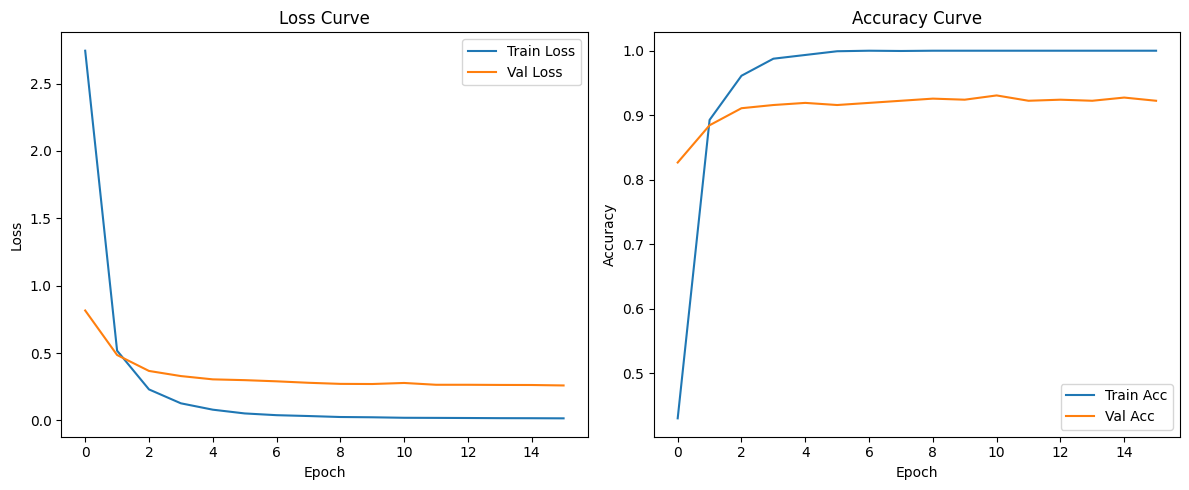

In [2]:
from models import Caltech101Classifier
from train import Trainer, count_params

model = Caltech101Classifier(arch='resnet18', pretrained=True)  # 加载ImageNet权重

trainer = Trainer(
    model=model,
    mode='finetune',
    lr=0.01,                 # 总体学习率
    backbone_lr=0.001,       # 主干网络较小学习率
    head_lr=0.01,            # 分类头较大学习率
    reg=1e-4,
    step_size=10,
    gamma=0.5,
    patience=5,
    momentum=0.9
)

# 4. 参数统计
count_params(model)

# 5. 开始训练
trainer.train(train_loader, val_loader, epochs=50, save_path="checkpoints/finetune_resnet18_4.pth")

# 6. 可视化
trainer.plot_learning_curve()

# 从头训练模式

### 1b
#### `step_size=10, gamma=0.5, head_lr=0.01, patience=5, reg=1e-4`, data augmentation
#### train acc=100%, val acc=49.17%, epochs=26
#### [TEST RESULT] Loss: 1.7064 | Accuracy: 57.85%

Total parameters: 11,228,325
Trainable parameters: 11,228,325



Epoch 1/100
Train Loss: 4.6957 | Acc: 2.64%
Val   Loss: 5.3866 | Acc: 4.95%
LR: 1.00e-02
--------------------------------------------------



Epoch 2/100
Train Loss: 4.3098 | Acc: 6.85%
Val   Loss: 4.3319 | Acc: 6.77%
LR: 1.00e-02
--------------------------------------------------



Epoch 3/100
Train Loss: 3.9365 | Acc: 12.42%
Val   Loss: 4.3833 | Acc: 11.55%
LR: 1.00e-02
--------------------------------------------------



Epoch 4/100
Train Loss: 3.5125 | Acc: 19.35%
Val   Loss: 3.6986 | Acc: 16.34%
LR: 1.00e-02
--------------------------------------------------



Epoch 5/100
Train Loss: 3.1148 | Acc: 25.25%
Val   Loss: 3.6761 | Acc: 15.84%
LR: 1.00e-02
--------------------------------------------------



Epoch 6/100
Train Loss: 2.7835 | Acc: 32.05%
Val   Loss: 3.5673 | Acc: 22.28%
LR: 1.00e-02
--------------------------------------------------



Epoch 7/100
Train Loss: 2.4326 | Acc: 37.75%
Val   Loss: 4.5836 | Acc: 18.65%
LR: 1.00e-02
--------------------------------------------------



Epoch 8/100
Train Loss: 2.0610 | Acc: 47.48%
Val   Loss: 3.1146 | Acc: 28.05%
LR: 1.00e-02
--------------------------------------------------



Epoch 9/100
Train Loss: 1.7867 | Acc: 52.85%
Val   Loss: 2.8611 | Acc: 34.32%
LR: 1.00e-02
--------------------------------------------------



Epoch 10/100
Train Loss: 1.4342 | Acc: 61.59%
Val   Loss: 3.1704 | Acc: 30.36%
LR: 1.00e-02
--------------------------------------------------



Epoch 11/100
Train Loss: 0.8244 | Acc: 81.44%
Val   Loss: 2.3720 | Acc: 44.39%
LR: 5.00e-03
--------------------------------------------------



Epoch 12/100
Train Loss: 0.5430 | Acc: 90.64%
Val   Loss: 2.2290 | Acc: 46.53%
LR: 5.00e-03
--------------------------------------------------



Epoch 13/100
Train Loss: 0.3840 | Acc: 94.14%
Val   Loss: 2.3674 | Acc: 43.89%
LR: 5.00e-03
--------------------------------------------------



Epoch 14/100
Train Loss: 0.2606 | Acc: 97.73%
Val   Loss: 2.2620 | Acc: 45.21%
LR: 5.00e-03
--------------------------------------------------



Epoch 15/100
Train Loss: 0.1742 | Acc: 98.80%
Val   Loss: 2.2447 | Acc: 45.21%
LR: 5.00e-03
--------------------------------------------------



Epoch 16/100
Train Loss: 0.1206 | Acc: 99.71%
Val   Loss: 2.1763 | Acc: 47.52%
LR: 5.00e-03
--------------------------------------------------



Epoch 17/100
Train Loss: 0.0825 | Acc: 99.88%
Val   Loss: 2.1980 | Acc: 47.03%
LR: 5.00e-03
--------------------------------------------------



Epoch 18/100
Train Loss: 0.0642 | Acc: 99.92%
Val   Loss: 2.1388 | Acc: 48.68%
LR: 5.00e-03
--------------------------------------------------



Epoch 19/100
Train Loss: 0.0516 | Acc: 99.96%
Val   Loss: 2.1608 | Acc: 48.68%
LR: 5.00e-03
--------------------------------------------------



Epoch 20/100
Train Loss: 0.0411 | Acc: 99.96%
Val   Loss: 2.1374 | Acc: 48.51%
LR: 5.00e-03
--------------------------------------------------



Epoch 21/100
Train Loss: 0.0336 | Acc: 100.00%
Val   Loss: 2.1200 | Acc: 49.17%
LR: 2.50e-03
--------------------------------------------------



Epoch 22/100
Train Loss: 0.0329 | Acc: 100.00%
Val   Loss: 2.1332 | Acc: 47.69%
LR: 2.50e-03
--------------------------------------------------



Epoch 23/100
Train Loss: 0.0286 | Acc: 100.00%
Val   Loss: 2.1241 | Acc: 48.51%
LR: 2.50e-03
--------------------------------------------------



Epoch 24/100
Train Loss: 0.0275 | Acc: 100.00%
Val   Loss: 2.1019 | Acc: 49.17%
LR: 2.50e-03
--------------------------------------------------



Epoch 25/100
Train Loss: 0.0265 | Acc: 100.00%
Val   Loss: 2.1258 | Acc: 48.84%
LR: 2.50e-03
--------------------------------------------------



Epoch 26/100
Train Loss: 0.0259 | Acc: 99.96%
Val   Loss: 2.1243 | Acc: 48.84%
LR: 2.50e-03
--------------------------------------------------
Early stopping at epoch 27


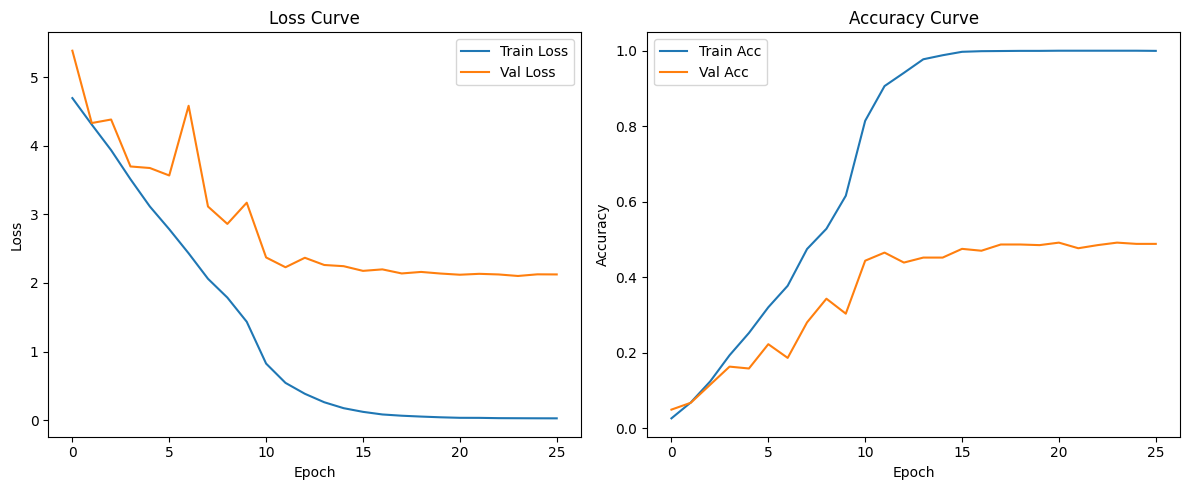

In [9]:
from models import Caltech101Classifier
from train import Trainer, count_params

model = Caltech101Classifier(arch='resnet18', pretrained=False)  # 加载ImageNet权重

trainer = Trainer(
    model=model,
    mode='scratch',
    lr=0.01,                 # 总体学习率
    reg=1e-4,
    step_size=10,
    gamma=0.5,
    patience=5,
    momentum=0.9
)

# 4. 参数统计
count_params(model)

# 5. 开始训练
trainer.train(train_loader, val_loader, epochs=100, save_path="checkpoints/scratch_resnet18.pth")

# 6. 可视化
trainer.plot_learning_curve()


### 2b
#### `step_size=10, gamma=0.5, lr=0.1, patience=5, reg=1e-4, epochs=100`, data augmentation
#### train acc=100%, val acc=50.33%, epochs=43
#### [TEST RESULT] Loss: 1.8771 | Accuracy: 58.47%

Total parameters: 11,228,325
Trainable parameters: 11,228,325



Epoch 1/100
Train Loss: 5.1708 | Acc: 0.83%
Val   Loss: 4.6032 | Acc: 0.99%
LR: 1.00e-01
--------------------------------------------------



Epoch 2/100
Train Loss: 4.5379 | Acc: 2.81%
Val   Loss: 4.4421 | Acc: 2.48%
LR: 1.00e-01
--------------------------------------------------



Epoch 3/100
Train Loss: 4.4104 | Acc: 3.96%
Val   Loss: 4.4252 | Acc: 3.14%
LR: 1.00e-01
--------------------------------------------------



Epoch 4/100
Train Loss: 4.3062 | Acc: 4.99%
Val   Loss: 4.3379 | Acc: 6.11%
LR: 1.00e-01
--------------------------------------------------



Epoch 5/100
Train Loss: 4.2142 | Acc: 6.11%
Val   Loss: 4.2949 | Acc: 7.76%
LR: 1.00e-01
--------------------------------------------------



Epoch 6/100
Train Loss: 4.1238 | Acc: 8.46%
Val   Loss: 4.1850 | Acc: 7.26%
LR: 1.00e-01
--------------------------------------------------



Epoch 7/100
Train Loss: 3.9994 | Acc: 9.41%
Val   Loss: 4.1403 | Acc: 8.09%
LR: 1.00e-01
--------------------------------------------------



Epoch 8/100
Train Loss: 3.8747 | Acc: 11.14%
Val   Loss: 4.0162 | Acc: 12.05%
LR: 1.00e-01
--------------------------------------------------



Epoch 9/100
Train Loss: 3.6947 | Acc: 14.44%
Val   Loss: 3.9102 | Acc: 11.39%
LR: 1.00e-01
--------------------------------------------------



Epoch 10/100
Train Loss: 3.4676 | Acc: 17.41%
Val   Loss: 3.6783 | Acc: 17.82%
LR: 1.00e-01
--------------------------------------------------



Epoch 11/100
Train Loss: 2.9758 | Acc: 27.35%
Val   Loss: 3.2499 | Acc: 24.92%
LR: 5.00e-02
--------------------------------------------------



Epoch 12/100
Train Loss: 2.6675 | Acc: 33.75%
Val   Loss: 3.3334 | Acc: 24.92%
LR: 5.00e-02
--------------------------------------------------



Epoch 13/100
Train Loss: 2.4318 | Acc: 38.86%
Val   Loss: 3.0638 | Acc: 26.40%
LR: 5.00e-02
--------------------------------------------------



Epoch 14/100
Train Loss: 2.2185 | Acc: 43.23%
Val   Loss: 3.1402 | Acc: 27.23%
LR: 5.00e-02
--------------------------------------------------



Epoch 15/100
Train Loss: 1.9947 | Acc: 46.95%
Val   Loss: 3.3639 | Acc: 26.57%
LR: 5.00e-02
--------------------------------------------------



Epoch 16/100
Train Loss: 1.7291 | Acc: 53.88%
Val   Loss: 3.0109 | Acc: 32.67%
LR: 5.00e-02
--------------------------------------------------



Epoch 17/100
Train Loss: 1.4499 | Acc: 60.56%
Val   Loss: 3.0776 | Acc: 32.34%
LR: 5.00e-02
--------------------------------------------------



Epoch 18/100
Train Loss: 1.1316 | Acc: 69.02%
Val   Loss: 3.0601 | Acc: 37.62%
LR: 5.00e-02
--------------------------------------------------



Epoch 19/100
Train Loss: 0.9702 | Acc: 72.90%
Val   Loss: 3.2630 | Acc: 35.64%
LR: 5.00e-02
--------------------------------------------------



Epoch 20/100
Train Loss: 0.6995 | Acc: 80.73%
Val   Loss: 3.6485 | Acc: 33.50%
LR: 5.00e-02
--------------------------------------------------



Epoch 21/100
Train Loss: 0.3188 | Acc: 92.16%
Val   Loss: 2.4651 | Acc: 46.70%
LR: 2.50e-02
--------------------------------------------------



Epoch 22/100
Train Loss: 0.1328 | Acc: 97.77%
Val   Loss: 2.4902 | Acc: 43.56%
LR: 2.50e-02
--------------------------------------------------



Epoch 23/100
Train Loss: 0.0744 | Acc: 99.50%
Val   Loss: 2.4342 | Acc: 47.36%
LR: 2.50e-02
--------------------------------------------------



Epoch 24/100
Train Loss: 0.0448 | Acc: 99.79%
Val   Loss: 2.4276 | Acc: 46.70%
LR: 2.50e-02
--------------------------------------------------



Epoch 25/100
Train Loss: 0.0324 | Acc: 99.92%
Val   Loss: 2.4205 | Acc: 47.52%
LR: 2.50e-02
--------------------------------------------------



Epoch 26/100
Train Loss: 0.0228 | Acc: 100.00%
Val   Loss: 2.3978 | Acc: 48.18%
LR: 2.50e-02
--------------------------------------------------



Epoch 27/100
Train Loss: 0.0205 | Acc: 100.00%
Val   Loss: 2.4413 | Acc: 48.35%
LR: 2.50e-02
--------------------------------------------------



Epoch 28/100
Train Loss: 0.0165 | Acc: 100.00%
Val   Loss: 2.4191 | Acc: 49.17%
LR: 2.50e-02
--------------------------------------------------



Epoch 29/100
Train Loss: 0.0135 | Acc: 100.00%
Val   Loss: 2.3940 | Acc: 49.01%
LR: 2.50e-02
--------------------------------------------------



Epoch 30/100
Train Loss: 0.0115 | Acc: 100.00%
Val   Loss: 2.4164 | Acc: 48.51%
LR: 2.50e-02
--------------------------------------------------



Epoch 31/100
Train Loss: 0.0105 | Acc: 100.00%
Val   Loss: 2.4179 | Acc: 48.18%
LR: 1.25e-02
--------------------------------------------------



Epoch 32/100
Train Loss: 0.0102 | Acc: 100.00%
Val   Loss: 2.4320 | Acc: 48.84%
LR: 1.25e-02
--------------------------------------------------



Epoch 33/100
Train Loss: 0.0106 | Acc: 99.96%
Val   Loss: 2.4116 | Acc: 49.50%
LR: 1.25e-02
--------------------------------------------------



Epoch 34/100
Train Loss: 0.0097 | Acc: 99.96%
Val   Loss: 2.4103 | Acc: 47.36%
LR: 1.25e-02
--------------------------------------------------



Epoch 35/100
Train Loss: 0.0088 | Acc: 100.00%
Val   Loss: 2.4090 | Acc: 48.18%
LR: 1.25e-02
--------------------------------------------------



Epoch 36/100
Train Loss: 0.0085 | Acc: 100.00%
Val   Loss: 2.3929 | Acc: 48.35%
LR: 1.25e-02
--------------------------------------------------



Epoch 37/100
Train Loss: 0.0081 | Acc: 100.00%
Val   Loss: 2.4289 | Acc: 49.01%
LR: 1.25e-02
--------------------------------------------------



Epoch 38/100
Train Loss: 0.0072 | Acc: 100.00%
Val   Loss: 2.4199 | Acc: 50.33%
LR: 1.25e-02
--------------------------------------------------



Epoch 39/100
Train Loss: 0.0075 | Acc: 100.00%
Val   Loss: 2.4161 | Acc: 49.34%
LR: 1.25e-02
--------------------------------------------------



Epoch 40/100
Train Loss: 0.0070 | Acc: 100.00%
Val   Loss: 2.4267 | Acc: 49.01%
LR: 1.25e-02
--------------------------------------------------



Epoch 41/100
Train Loss: 0.0068 | Acc: 100.00%
Val   Loss: 2.4141 | Acc: 48.84%
LR: 6.25e-03
--------------------------------------------------



Epoch 42/100
Train Loss: 0.0073 | Acc: 100.00%
Val   Loss: 2.4183 | Acc: 48.51%
LR: 6.25e-03
--------------------------------------------------



Epoch 43/100
Train Loss: 0.0065 | Acc: 100.00%
Val   Loss: 2.4199 | Acc: 49.83%
LR: 6.25e-03
--------------------------------------------------
Early stopping at epoch 44


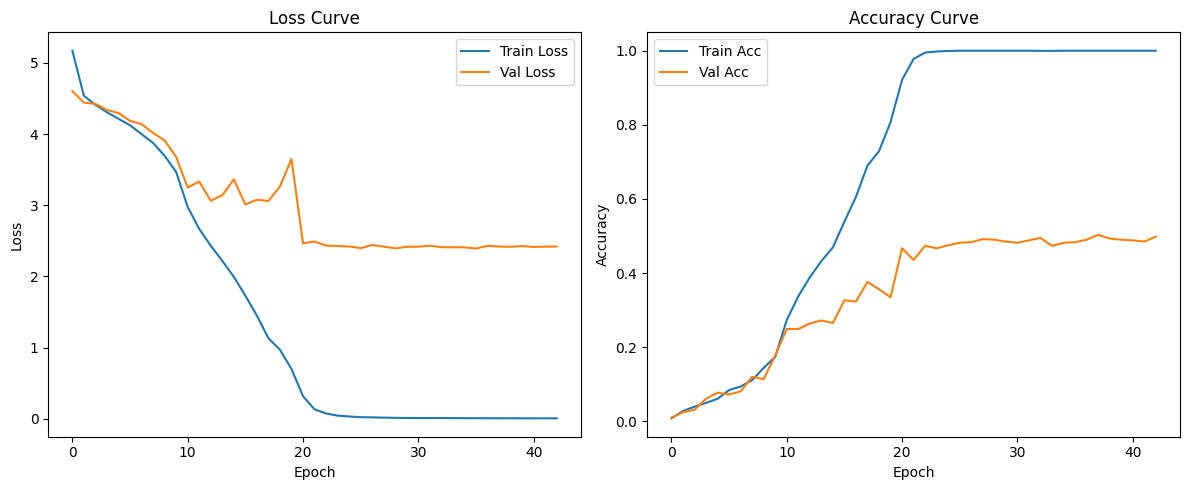

In [10]:
from models import Caltech101Classifier
from train import Trainer, count_params

model = Caltech101Classifier(arch='resnet18', pretrained=False)  # 加载ImageNet权重

trainer = Trainer(
    model=model,
    mode='scratch',
    lr=0.1,                 # 总体学习率
    reg=1e-4,
    step_size=10,
    gamma=0.5,
    patience=5,
    momentum=0.9
)

# 4. 参数统计
count_params(model)

# 5. 开始训练
trainer.train(train_loader, val_loader, epochs=100, save_path="checkpoints/scratch_resnet18_1.pth")

# 6. 可视化
trainer.plot_learning_curve()

### 3b
#### `step_size=10, gamma=0.5, lr=0.1, patience=5, reg=1e-3, epochs=100`, data augmentation
#### train acc=100%, val acc=53.30%, epochs=43
#### test acc=60.35%

d:\APP\Python\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\APP\Python\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Total parameters: 11,228,325
Trainable parameters: 11,228,325



Epoch 1/100
Train Loss: 5.2492 | Acc: 1.03%
Val   Loss: 4.6089 | Acc: 1.82%
LR: 1.00e-01
--------------------------------------------------



Epoch 2/100
Train Loss: 4.5572 | Acc: 2.56%
Val   Loss: 4.4935 | Acc: 1.65%
LR: 1.00e-01
--------------------------------------------------



Epoch 3/100
Train Loss: 4.4313 | Acc: 3.67%
Val   Loss: 4.3967 | Acc: 4.79%
LR: 1.00e-01
--------------------------------------------------



Epoch 4/100
Train Loss: 4.2925 | Acc: 5.53%
Val   Loss: 4.3857 | Acc: 4.13%
LR: 1.00e-01
--------------------------------------------------



Epoch 5/100
Train Loss: 4.2153 | Acc: 5.45%
Val   Loss: 4.3321 | Acc: 5.28%
LR: 1.00e-01
--------------------------------------------------



Epoch 6/100
Train Loss: 4.1171 | Acc: 7.96%
Val   Loss: 4.1856 | Acc: 7.26%
LR: 1.00e-01
--------------------------------------------------



Epoch 7/100
Train Loss: 4.0270 | Acc: 8.21%
Val   Loss: 4.0916 | Acc: 9.24%
LR: 1.00e-01
--------------------------------------------------



Epoch 8/100
Train Loss: 3.8588 | Acc: 11.30%
Val   Loss: 4.0672 | Acc: 10.07%
LR: 1.00e-01
--------------------------------------------------



Epoch 9/100
Train Loss: 3.6709 | Acc: 14.93%
Val   Loss: 3.9085 | Acc: 13.70%
LR: 1.00e-01
--------------------------------------------------



Epoch 10/100
Train Loss: 3.4585 | Acc: 17.86%
Val   Loss: 3.7563 | Acc: 14.69%
LR: 1.00e-01
--------------------------------------------------



Epoch 11/100
Train Loss: 2.9972 | Acc: 27.31%
Val   Loss: 3.3559 | Acc: 22.61%
LR: 5.00e-02
--------------------------------------------------



Epoch 12/100
Train Loss: 2.7828 | Acc: 32.05%
Val   Loss: 3.4826 | Acc: 20.46%
LR: 5.00e-02
--------------------------------------------------



Epoch 13/100
Train Loss: 2.6168 | Acc: 34.86%
Val   Loss: 3.0143 | Acc: 29.04%
LR: 5.00e-02
--------------------------------------------------



Epoch 14/100
Train Loss: 2.3761 | Acc: 40.35%
Val   Loss: 2.9045 | Acc: 29.54%
LR: 5.00e-02
--------------------------------------------------



Epoch 15/100
Train Loss: 2.1586 | Acc: 43.69%
Val   Loss: 2.9633 | Acc: 31.02%
LR: 5.00e-02
--------------------------------------------------



Epoch 16/100
Train Loss: 1.9969 | Acc: 48.76%
Val   Loss: 3.0306 | Acc: 30.53%
LR: 5.00e-02
--------------------------------------------------



Epoch 17/100
Train Loss: 1.7428 | Acc: 53.30%
Val   Loss: 3.0197 | Acc: 31.35%
LR: 5.00e-02
--------------------------------------------------



Epoch 18/100
Train Loss: 1.4392 | Acc: 60.93%
Val   Loss: 3.7192 | Acc: 25.58%
LR: 5.00e-02
--------------------------------------------------



Epoch 19/100
Train Loss: 1.2692 | Acc: 65.43%
Val   Loss: 2.9702 | Acc: 31.35%
LR: 5.00e-02
--------------------------------------------------



Epoch 20/100
Train Loss: 0.9481 | Acc: 74.96%
Val   Loss: 2.9967 | Acc: 34.32%
LR: 5.00e-02
--------------------------------------------------



Epoch 21/100
Train Loss: 0.4372 | Acc: 91.09%
Val   Loss: 2.2991 | Acc: 45.38%
LR: 2.50e-02
--------------------------------------------------



Epoch 22/100
Train Loss: 0.2112 | Acc: 97.11%
Val   Loss: 2.2835 | Acc: 44.72%
LR: 2.50e-02
--------------------------------------------------



Epoch 23/100
Train Loss: 0.1054 | Acc: 99.55%
Val   Loss: 2.1527 | Acc: 48.68%
LR: 2.50e-02
--------------------------------------------------



Epoch 24/100
Train Loss: 0.0634 | Acc: 99.88%
Val   Loss: 2.0869 | Acc: 50.17%
LR: 2.50e-02
--------------------------------------------------



Epoch 25/100
Train Loss: 0.0450 | Acc: 100.00%
Val   Loss: 2.0507 | Acc: 50.33%
LR: 2.50e-02
--------------------------------------------------



Epoch 26/100
Train Loss: 0.0355 | Acc: 100.00%
Val   Loss: 2.0489 | Acc: 51.65%
LR: 2.50e-02
--------------------------------------------------



Epoch 27/100
Train Loss: 0.0337 | Acc: 100.00%
Val   Loss: 2.0763 | Acc: 50.50%
LR: 2.50e-02
--------------------------------------------------



Epoch 28/100
Train Loss: 0.0281 | Acc: 100.00%
Val   Loss: 2.0310 | Acc: 51.65%
LR: 2.50e-02
--------------------------------------------------



Epoch 29/100
Train Loss: 0.0254 | Acc: 100.00%
Val   Loss: 2.0143 | Acc: 52.31%
LR: 2.50e-02
--------------------------------------------------



Epoch 30/100
Train Loss: 0.0259 | Acc: 100.00%
Val   Loss: 1.9998 | Acc: 51.98%
LR: 2.50e-02
--------------------------------------------------



Epoch 31/100
Train Loss: 0.0235 | Acc: 100.00%
Val   Loss: 2.0042 | Acc: 52.15%
LR: 1.25e-02
--------------------------------------------------



Epoch 32/100
Train Loss: 0.0220 | Acc: 100.00%
Val   Loss: 2.0137 | Acc: 51.65%
LR: 1.25e-02
--------------------------------------------------



Epoch 33/100
Train Loss: 0.0204 | Acc: 100.00%
Val   Loss: 1.9804 | Acc: 52.97%
LR: 1.25e-02
--------------------------------------------------



Epoch 34/100
Train Loss: 0.0199 | Acc: 100.00%
Val   Loss: 1.9790 | Acc: 51.49%
LR: 1.25e-02
--------------------------------------------------



Epoch 35/100
Train Loss: 0.0197 | Acc: 100.00%
Val   Loss: 1.9749 | Acc: 52.81%
LR: 1.25e-02
--------------------------------------------------



Epoch 36/100
Train Loss: 0.0211 | Acc: 100.00%
Val   Loss: 1.9684 | Acc: 52.81%
LR: 1.25e-02
--------------------------------------------------



Epoch 37/100
Train Loss: 0.0204 | Acc: 100.00%
Val   Loss: 1.9677 | Acc: 52.15%
LR: 1.25e-02
--------------------------------------------------



Epoch 38/100
Train Loss: 0.0199 | Acc: 100.00%
Val   Loss: 1.9521 | Acc: 53.30%
LR: 1.25e-02
--------------------------------------------------



Epoch 39/100
Train Loss: 0.0196 | Acc: 100.00%
Val   Loss: 1.9790 | Acc: 52.31%
LR: 1.25e-02
--------------------------------------------------



Epoch 40/100
Train Loss: 0.0195 | Acc: 100.00%
Val   Loss: 1.9777 | Acc: 52.81%
LR: 1.25e-02
--------------------------------------------------



Epoch 41/100
Train Loss: 0.0185 | Acc: 100.00%
Val   Loss: 1.9624 | Acc: 52.97%
LR: 6.25e-03
--------------------------------------------------



Epoch 42/100
Train Loss: 0.0188 | Acc: 100.00%
Val   Loss: 1.9583 | Acc: 51.82%
LR: 6.25e-03
--------------------------------------------------



Epoch 43/100
Train Loss: 0.0191 | Acc: 100.00%
Val   Loss: 1.9462 | Acc: 51.82%
LR: 6.25e-03
--------------------------------------------------
Early stopping at epoch 44


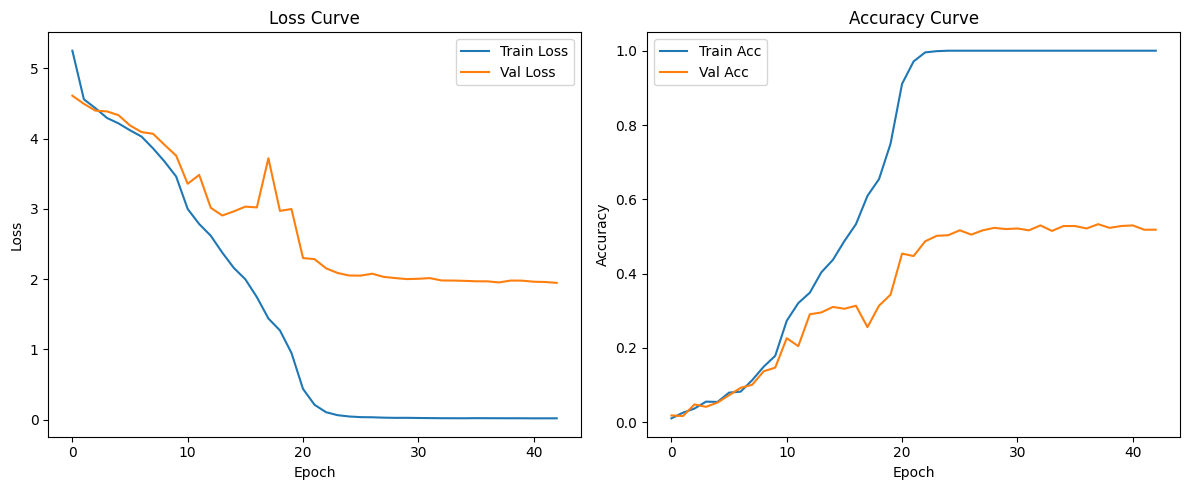

In [4]:
from models import Caltech101Classifier
from train import Trainer, count_params

model = Caltech101Classifier(arch='resnet18', pretrained=False)  # 不加载ImageNet权重

trainer = Trainer(
    model=model,
    mode='scratch',
    lr=0.1,                 # 总体学习率
    reg=1e-3,
    step_size=10,
    gamma=0.5,
    patience=5,
    momentum=0.9
)

# 4. 参数统计
count_params(model)

# 5. 开始训练
trainer.train(train_loader, val_loader, epochs=100, save_path="checkpoints/scratch_resnet18_2.pth")

# 6. 可视化
trainer.plot_learning_curve()

### 4b
#### `step_size=10, gamma=0.5, lr=0.1, patience=5, reg=1e-2, epochs=100`, data augmentation

d:\APP\Python\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\APP\Python\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Total parameters: 11,228,325
Trainable parameters: 11,228,325



Epoch 1/100
Train Loss: 5.0555 | Acc: 0.95%
Val   Loss: 4.6166 | Acc: 0.99%
LR: 1.00e-01
--------------------------------------------------



Epoch 2/100
Train Loss: 4.5982 | Acc: 1.32%
Val   Loss: 4.6152 | Acc: 0.99%
LR: 1.00e-01
--------------------------------------------------



Epoch 3/100
Train Loss: 4.5334 | Acc: 2.06%
Val   Loss: 4.5845 | Acc: 1.98%
LR: 1.00e-01
--------------------------------------------------



Epoch 4/100
Train Loss: 4.5125 | Acc: 2.06%
Val   Loss: 4.5801 | Acc: 1.49%
LR: 1.00e-01
--------------------------------------------------



Epoch 5/100
Train Loss: 4.5184 | Acc: 1.86%
Val   Loss: 4.5120 | Acc: 1.49%
LR: 1.00e-01
--------------------------------------------------



Epoch 6/100
Train Loss: 4.5000 | Acc: 2.10%
Val   Loss: 4.7210 | Acc: 1.49%
LR: 1.00e-01
--------------------------------------------------



Epoch 7/100
Train Loss: 4.5035 | Acc: 1.98%
Val   Loss: 4.4709 | Acc: 3.14%
LR: 1.00e-01
--------------------------------------------------



Epoch 8/100
Train Loss: 4.4919 | Acc: 2.27%
Val   Loss: 4.5026 | Acc: 0.99%
LR: 1.00e-01
--------------------------------------------------



Epoch 9/100
Train Loss: 4.4969 | Acc: 1.86%
Val   Loss: 4.5775 | Acc: 2.64%
LR: 1.00e-01
--------------------------------------------------



Epoch 10/100
Train Loss: 4.4771 | Acc: 2.31%
Val   Loss: 5.1643 | Acc: 1.32%
LR: 1.00e-01
--------------------------------------------------



Epoch 11/100
Train Loss: 4.4466 | Acc: 2.27%
Val   Loss: 4.5441 | Acc: 1.32%
LR: 5.00e-02
--------------------------------------------------



Epoch 12/100
Train Loss: 4.4203 | Acc: 2.23%
Val   Loss: 4.4261 | Acc: 1.65%
LR: 5.00e-02
--------------------------------------------------
Early stopping at epoch 13


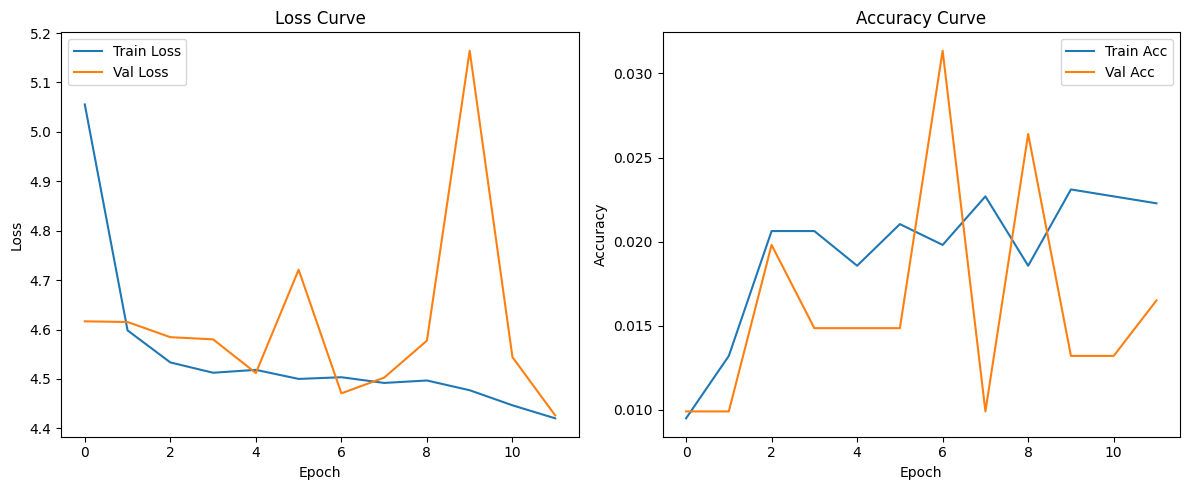

In [3]:
from models import Caltech101Classifier
from train import Trainer, count_params

model = Caltech101Classifier(arch='resnet18', pretrained=False)  # 不加载ImageNet权重

trainer = Trainer(
    model=model,
    mode='scratch',
    lr=0.1,                 # 总体学习率
    reg=1e-2,
    step_size=10,
    gamma=0.5,
    patience=5,
    momentum=0.9
)

# 4. 参数统计
count_params(model)

# 5. 开始训练
trainer.train(train_loader, val_loader, epochs=100, save_path="checkpoints/scratch_resnet18_3.pth")

# 6. 可视化
trainer.plot_learning_curve()

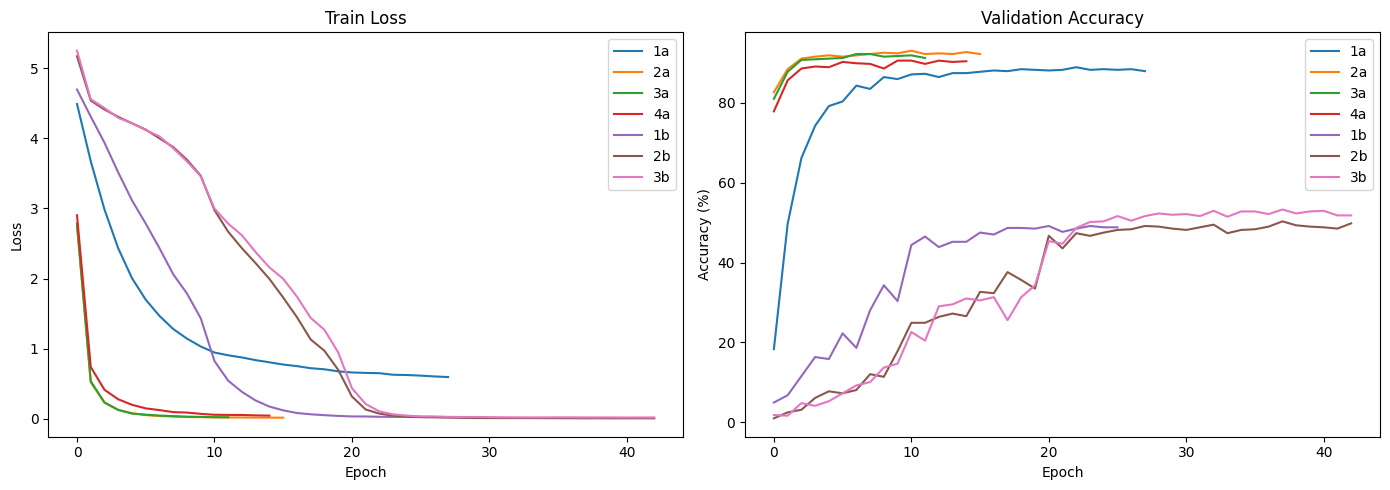

In [17]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 绘制 Train Loss
ax1.plot(train_loss_1a, label='1a')
ax1.plot(train_loss_2a, label='2a')
ax1.plot(train_loss_3a, label='3a')
ax1.plot(train_loss_4a, label='4a')
ax1.plot(train_loss_1b, label='1b')
ax1.plot(train_loss_2b, label='2b')
ax1.plot(train_loss_3b, label='3b')
ax1.set_title('Train Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# 绘制 Val Acc
ax2.plot(val_acc_1a, label='1a')
ax2.plot(val_acc_2a, label='2a')
ax2.plot(val_acc_3a, label='3a')
ax2.plot(val_acc_4a, label='4a')
ax2.plot(val_acc_1b, label='1b')
ax2.plot(val_acc_2b, label='2b')
ax2.plot(val_acc_3b, label='3b')
ax2.set_title('Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()

# 调整布局并显示
plt.tight_layout()
plt.show()